# Importing Packages & Set Up Data Layout

## Preprocessing Information for the Given Data.

A high-pass filter with a 30 Hz cut-off frequency and a power line notch filter (50 Hz) were used. All recordings are artifact-free EEG segments of 60 seconds duration. At the stage of data preprocessing, the Independent Component Analysis (ICA) was used to eliminate the artifacts (eyes, muscle, and cardiac overlapping of the cardiac pulsation). The arithmetic task was the serial subtraction of two numbers. Each trial started with the communication orally 4-digit (minuend) and 2-digit (subtrahend) numbers (e.g. 3141 and 42).

In [62]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# ! pip install mne

# Read raw data files where each file contains a run
files = ['../datasets/HW2Datasets/Subject06_1.edf', '../datasets/HW2Datasets/Subject06_2.edf', '../datasets/HW2Datasets/Subject07_1.edf', '../datasets/HW2Datasets/Subject07_2.edf']

# Read the raw EDF files into an array
raws = [read_raw_edf(f, preload=True) for f in files]

# Loop through the array and make the following changes to the raw files
for raw in raws:

    # Rename the raw channels
    raw.rename_channels({'EEG F3':'F3', 'EEG F4':'F4',
                            'EEG Fp1':'Fp1', 'EEG Fp2':'Fp2', 'EEG F7':'F7', 'EEG F8':'F8',
                            'EEG T3':'T3', 'EEG T4':'T4', 'EEG C3':'C3', 'EEG C4':'C4',
                            'EEG T5':'T5', 'EEG T6':'T6', 'EEG P3':'P3', 'EEG P4':'P4',
                            'EEG O1':'O1', 'EEG O2':'O2', 'EEG Fz':'Fz', 'EEG Cz':'Cz',
                            'EEG Pz':'Pz', 'EEG A2-A1':'A2', 'ECG ECG':'ECG'})


    # Set channel types
    raw.set_channel_types({'ECG':'ecg'})

    # Define the channel locations
    raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

    # Print Raw Channel Names for double checking
    print(raw.ch_names)

# Rename the raws with more insightfull names
subject6_background = raws[0] # Subject 6 background raw
subject6_task = raws[1] # Subject 6 task raw
subject7_background = raws[2] # Subject 7 background raw
subject7_task = raws[3] # Subject 7 task raw

Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_2.edf...
EDF file de

# Q1)

## Plot the power spectral density for the two conditions (background and task). Discuss the main difference between the two groups.

For this task, I have ploted 4 power spectral density plots for each of the subjects and states along with a custom mean spectral density plot to better see some overall occuring trends.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/home/joshua/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


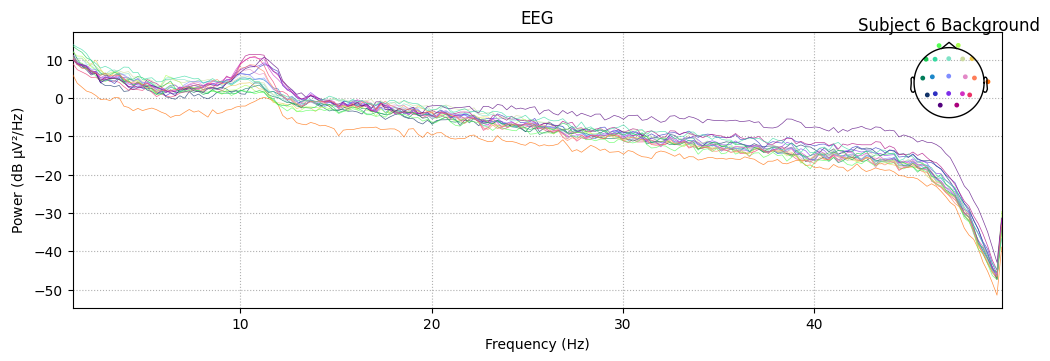

In [63]:
# Plot Subject 6 Background between 1hz and 50hz
subject6_background.plot_psd(fmin=1, fmax=50)
plt.title('Subject 6 Background') # Set Title for easier interpretation
plt.show() # Show plot

The plot above (subject 6 background state) is one that has a mini ramp up in power at frequency 12hz or so. Another thing to mention is that most of the channels near the frontal lobe (left dominant) are occupied from frequencies 1hz to around 8hz and then it flips to a primarly occipital lobe (right dominant) occupied from frequencies 8hz to around 14hz. After that there is no noticeably active area all relatively equal from 14hz to the end (50hz here) besides a purple channel (occipital lobe) becomes more powerful compared to the rest. Also last thing to mention here, the orange channel is way weaker than the other signals and could be because it's on the side of the head where it's harder to read the signal.

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).


/home/joshua/.local/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


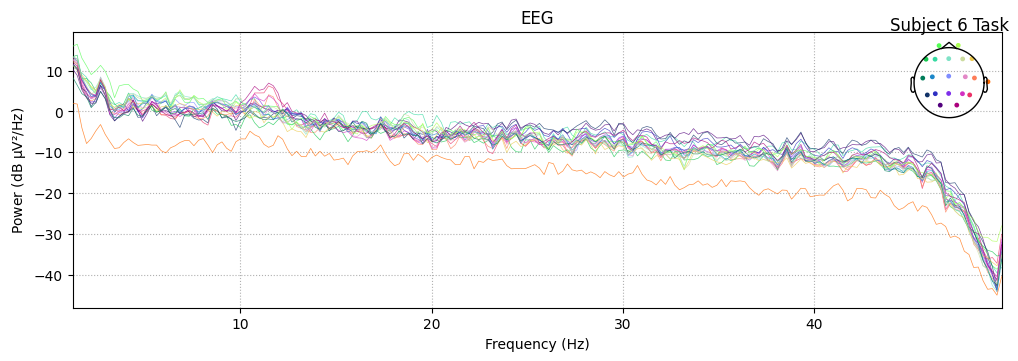

In [64]:
# Plot Subject 6 Task between 1hz and 50hz
subject6_task.plot_psd(fmin=1, fmax=50)
plt.title('Subject 6 Task') # Set Title for easier interpretation
plt.show() # Show plot

The plot above (subject 6 test state) also has a mini ramp up near 12hz, however the power of that ramp up is less in this plot vs the previous one (10 to 6) potentially indecating a lower usage of the occipital lobe. The Fronal lobe (left dominant) from before grows in it's relative power from 1hz to 10hz over the other channels and actually see a reduction in the power of the 

In [ ]:
# Plot Subject 7 Background between 1hz and 50hz
subject7_background.plot_psd(fmin=1, fmax=50)
plt.title('Subject 7 Background') # Set Title for easier interpretation
plt.show() # Show plot

In [ ]:
# Plot Subject 7 Task between 1hz and 50hz
subject7_task.plot_psd(fmin=1, fmax=50)
plt.title('Subject 7 Task') # Set Title for easier interpretation
plt.show() # Show plot

Effective window size : 4.096 (s)


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


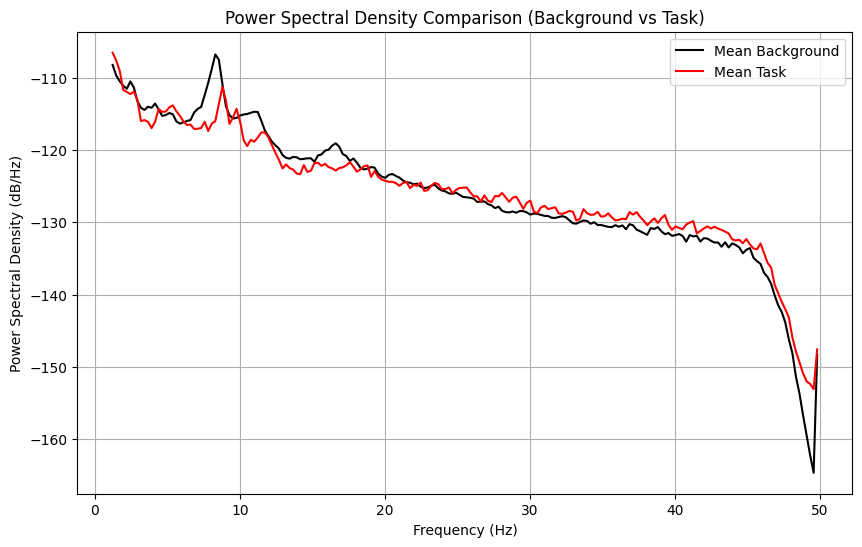

In [58]:
# Compute PSDs for both raw files
psd_0, freqs_0 = raws[0].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)
psd_1, freqs_1 = raws[1].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)
psd_2, freqs_2 = raws[2].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)
psd_3, freqs_3 = raws[3].compute_psd(fmin=1, fmax=50).get_data(return_freqs=True)

# Average across channels for clearer comparison
psd_0_mean = np.mean(psd_0, axis=0)
psd_1_mean = np.mean(psd_1, axis=0)
psd_2_mean = np.mean(psd_2, axis=0)
psd_3_mean = np.mean(psd_3, axis=0)
psd_background_mean = (psd_0_mean + psd_2_mean) / 2
psd_task_mean = (psd_1_mean + psd_3_mean) / 2

# Plot both PSDs on the same plot
plt.figure(figsize=(10, 6))
# plt.plot(freqs_0, 10 * np.log10(psd_0_mean), color='cyan', label='Background (Subject 6)')
# plt.plot(freqs_1, 10 * np.log10(psd_1_mean), color='blue', label='Task (Subject 6)')
# plt.plot(freqs_1, 10 * np.log10(psd_2_mean), color='magenta', label='Background (Subject 7)')
# plt.plot(freqs_1, 10 * np.log10(psd_3_mean), color='purple', label='Task (Subject 7)')
plt.plot(freqs_1, 10 * np.log10(psd_background_mean), color='black', label='Mean Background')
plt.plot(freqs_1, 10 * np.log10(psd_task_mean), color='red', label='Mean Task')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density Comparison (Background vs Task)')
plt.legend()
plt.grid(True)
plt.show()


# Q2)
## Plot the spectrogram for the two conditions (background and task). Discuss the main differences between the two groups.

['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'A2', 'ECG']
['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'A2', 'ECG']
['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'A2', 'ECG']
['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz', 'A2', 'ECG']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


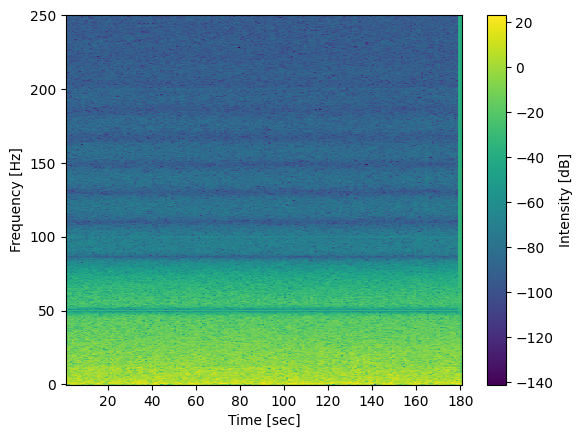

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


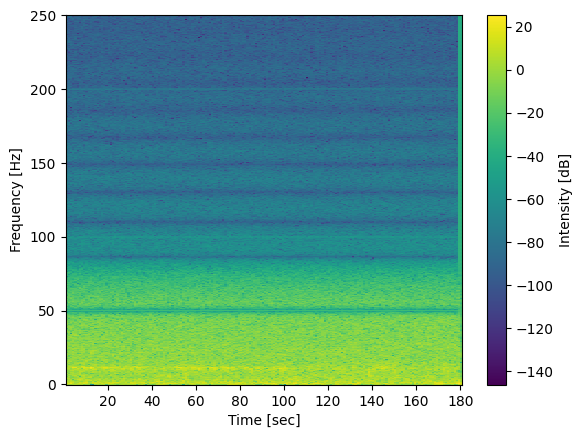

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


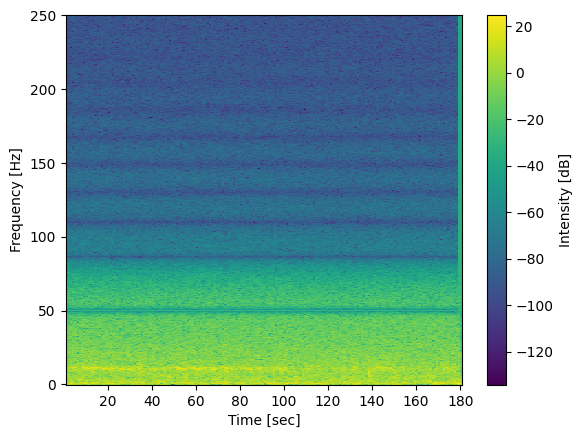

In [61]:
def plot_spectrogram(raw, channel_name):
    raw_copy = raw.copy() # avoid deletion of other channels through copying raw
    raw_copy.pick_channels([channel_name])
    eeg_data = raw_copy.get_data()[0]  # Shape is (n_channels, n_times)
    sfreq = raw_copy.info['sfreq']  # Sampling frequency

    # Compute spectrogram for the first channel (e.g., Fz)
    # f, t, Sxx = sp.signal.spectrogram(eeg_data[channel_idx,:], fs=sfreq, window=('hann'),
    f, t, Sxx = sp.signal.spectrogram(eeg_data, fs=sfreq, window=('hann'),
                                    nperseg=1500, noverlap=1000, scaling='density', mode='psd')

    plt.pcolormesh(t, f, 10*np.log10(Sxx*1e6**2), cmap='viridis')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar().set_label('Intensity [dB]')
    plt.show()

print(raws[0].ch_names)
print(raws[1].ch_names)
print(raws[2].ch_names)
print(raws[3].ch_names)
plot_spectrogram(raws[0], 'Fp1')
plot_spectrogram(raws[0], 'O1')
plot_spectrogram(raws[0], 'O2')
# plot_spectrogram(raws[1], 'Fp1')
# plot_spectrogram(raws[2], 'Fp1')
# plot_spectrogram(raws[3], 'Fp1')

# Q3)
## Plot the time domain signal in Alpha band (8-12 Hz) for the two conditions (background and task). Discuss the main differences between the two groups.

# Q4)
## Plot the topomap of average power spectral density in the alpha band (8-12 Hz) for the two conditions (background and task). Discuss the differences between the two conditions.